In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import seaborn as sns

In [ ]:
dir = "C:\\Users\\chloe\\wolkovich_s24\\TreeRings\\code\\focus_testng\\hsl_testing"
images = []
rows = 15
cols = 16

image_filenames = os.listdir("{}".format(dir))

In [39]:
def compute_variance(image):
    # adapted from macro info at https://imagejdocu.list.lu/macro/normalized_variance
    #cast 0 as NAN
    mask_nan=image.astype('float')
    mask_nan[mask_nan==0]=np.nan

    mean = np.nanmean(image)
    width, height = image.shape
    square_diff = (image - mean) **2
    b = np.nansum(square_diff)

    # Compute normVar, handling NaN values
    if b == 0.0:
        normVar = np.nan
    else:
        normVar = b / (height * width * mean)
    return normVar

In [ ]:
def hsl_mask(img):
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    s_channel = imgHSV[:,:,1]
    mask = cv2.inRange(s_channel, 0, 75)
    # mask = cv2.inRange(imgHSV, np.array([0,250,0]), np.array([255,255,255]))
    res =cv2.bitwise_and(imgRGB, imgRGB, mask=mask)
    return res

In [40]:
for image_name in image_filenames:
    image_path = os.path.join(dir, image_name)
    image = cv2.imread(image_path)
    masked = hsl_mask(image)
    var = compute_variance(cv2.cvtColor(masked, cv2.COLOR_RGB2GRAY))
    print("image: {} variance: {}".format(image_name, var))

image: border1_best.tiff variance: 2.848737436770814
image: border2_best.tiff variance: 9.198209004915444
image: center1_best.tiff variance: 1.754719912594728
image: center2_best.tiff variance: 1.440850994444786
image: edge1_best.tiff variance: 9.985004840095504
image: edge2_best.tiff variance: 11.320309584995382
nan!
image: focused_0_0.tiff variance: nan


9.623582957126594


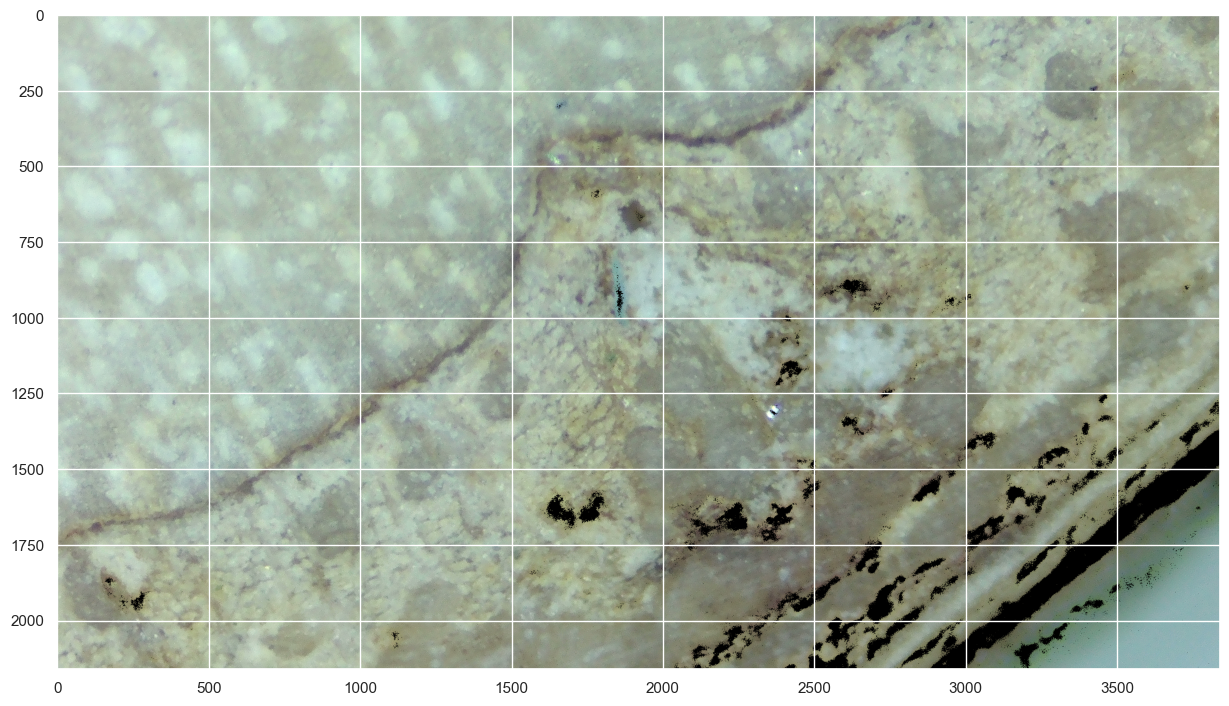

In [44]:
image = cv2.imread("{}\\border2_best.tiff".format(dir))
masked = hsl_mask(image)
plt.imshow(masked)

var = compute_variance(cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY))
# np.count_nonzero(np.isnan(mask_nan))

# plt.imshow(mask_nan)
print(var)


In [ ]:
variance_matrix =[]

for x in range(rows):
    row_matrix = []
    for y in range(cols):
        image = cv2.imread("{}\\focused_{}_{}.tiff".format(dir, x, y))
        masked_image = hsl_mask(image)

        grayscale_image = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)
        variance = compute_variance(grayscale_image)
        row_matrix.append(variance)
    variance_matrix.append(row_matrix)

In [ ]:
sns.set_theme(rc={'figure.figsize':(15,12)})
sns.heatmap(variance_matrix, annot=True)